In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from py_pcha import PCHA


In [2]:
df_immune = pd.read_csv('data/df_immune.csv',index_col='Unnamed: 0')
df_microbial = pd.read_csv('data/df_microbial.csv',index_col='Unnamed: 0')
df_rbc = pd.read_csv('data/df_rbc.csv',index_col='Unnamed: 0')
colors_m = ['tab:blue','tab:orange','tab:green','tab:red']
colors_i = ['tab:blue','tab:orange','tab:green','#ffed00']

markers = ['o','^','s','*']
edgecolors = {'tab:blue':'#103c5a','tab:orange':'#804007','tab:green':'#165016','tab:red':'#6b1414','#ffed00':'#998e00'}
sizes = [500,500,500,600]

In [3]:
np.random.seed(7)
MDI_mic = df_microbial[['M.zscore','D.zscore','I.zscore']].values
MDI_imm = df_immune[['M.zscore','D.zscore','I.zscore']].values
MDI_rbc = df_rbc[['M.zscore','D.zscore','I.zscore']].values
def sort_archetypes (arcs):
    inds = []
    arcs_remain = arcs.copy()
    arcs_ret = []
    inds.append(np.argmin(arcs_remain[:, 2]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs,inds,0)
    inds.append(np.argmax(arcs_remain[:, 2]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs_remain,inds[-1],0)
    inds.append(np.argmax(arcs_remain[:, 0]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs_remain,inds[-1],0)
    inds.append(np.argmax(arcs_remain[:, 1]))
    arcs_ret.append(arcs_remain[inds[-1]])
    return np.array(arcs_ret)

def sort_rbc (arcs):
    inds = []
    arcs_ret = []
    print(arcs)
    arcs_remain = arcs.copy()
    mask = (arcs[:, 0] < 0) & (arcs[:, 1] < 0) & (arcs[:, 2] < 0)
    inds.append(np.where(mask)[0][0])
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs,inds,0)
    print("adding blue circle:",arcs_ret,arcs_remain)

    inds.append(np.argmax(arcs_remain[:, 2]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs,inds,0)
    print("adding green square:",arcs_ret,arcs_remain)

    inds.append(np.argmax(arcs_remain[:, 2]))
    print(inds)
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs,inds,0)
    print("adding orange triangle:",arcs_ret,arcs_remain)

    inds.append(np.argmax(arcs_remain[:, 1]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs,inds,0)
    print("adding star:",arcs_ret,arcs_remain)

    return arcs_ret
def sort_rbc(arcs):
    arcs = np.array(arcs)
    arcs_ret = []
    
    arcs_remain = arcs.copy()
    
    # Find first archetype: the one where all values are negative
    mask = (arcs_remain[:, 0] < 0) & (arcs_remain[:, 1] < 0) & (arcs_remain[:, 2] < 0)
    if np.any(mask):
        idx = np.where(mask)[0][0]
        arcs_ret.append(arcs_remain[idx])
        arcs_remain = np.delete(arcs_remain, idx, axis=0)
    
    # Find second archetype: max in the 3rd column
    idx = np.argmax(arcs_remain[:, 2])
    arcs_ret.append(arcs_remain[idx])
    arcs_remain = np.delete(arcs_remain, idx, axis=0)
    
    # Find third archetype: max in the 3rd column again
    idx = np.argmax(arcs_remain[:, 2])
    arcs_ret.append(arcs_remain[idx])
    arcs_remain = np.delete(arcs_remain, idx, axis=0)
    
    # Find fourth archetype: max in the 2nd column
    idx = np.argmax(arcs_remain[:, 1])
    arcs_ret.append(arcs_remain[idx])
    
    return np.array(arcs_ret)


data_m = MDI_mic.transpose()
XC, S, C, SSE, varexpl = PCHA(data_m, noc=4, delta=0.5)
arcs_m = np.array(XC.transpose())
arcs_m = sort_archetypes(arcs_m)
#arcs_m = arcs_m[sorted_indices]
arc1_m = arcs_m[0]
arc2_m = arcs_m[1]
arc3_m = arcs_m[2]
arc4_m = arcs_m[3]
data_m = data_m.transpose()

data_i = MDI_imm.transpose()
XC, S, C, SSE, varexpl = PCHA(data_i, noc=4, delta=0.5)
arcs_i = np.array(XC.transpose())
arcs_i = sort_archetypes(arcs_i)

arc1_i = arcs_i[0]
arc2_i = arcs_i[1]
arc3_i = arcs_i[2]
arc4_i = arcs_i[3]
data_i = data_i.transpose()
print("rbc")
data_r = MDI_rbc.transpose()
XC, S, C, SSE, varexpl = PCHA(data_r, noc=4, delta=0.1)
arcs_r = np.array(XC.transpose())
arcs_r = sort_rbc(arcs_r)
arc1_r = arcs_r[0]
arc2_r = arcs_r[1]
arc3_r = arcs_r[2]
arc4_r = arcs_r[3]
data_r = data_r.transpose()


rbc


In [4]:
def plot_archetypes_2d (arcs,ax,dim_1,dim_2,labels = ['','','',''],colors=colors_m):
    for arc,color,marker,s,l in zip(arcs,colors,markers,sizes,labels):
        ax.scatter(arc[dim_1],arc[dim_2],color = color, s = s, marker = marker, edgecolors = edgecolors[color],label = l)
def plot_archetypes_3d (arcs,ax,labels = ['','','',''],colors=colors_m):
    for arc,color,marker,s,l in zip(arcs,colors,markers,sizes,labels):
        ax.scatter(arc[0],arc[1],arc[2],color = color, s = s, marker = marker, edgecolors = edgecolors[color],label = l)


[[-0.93688172 -1.22128337 -2.27882774]
 [-0.56426511 -0.54595039  4.22224982]
 [ 2.10743118 -0.75077644 -0.57191706]
 [ 1.41257186  4.01893035 -1.09109175]]


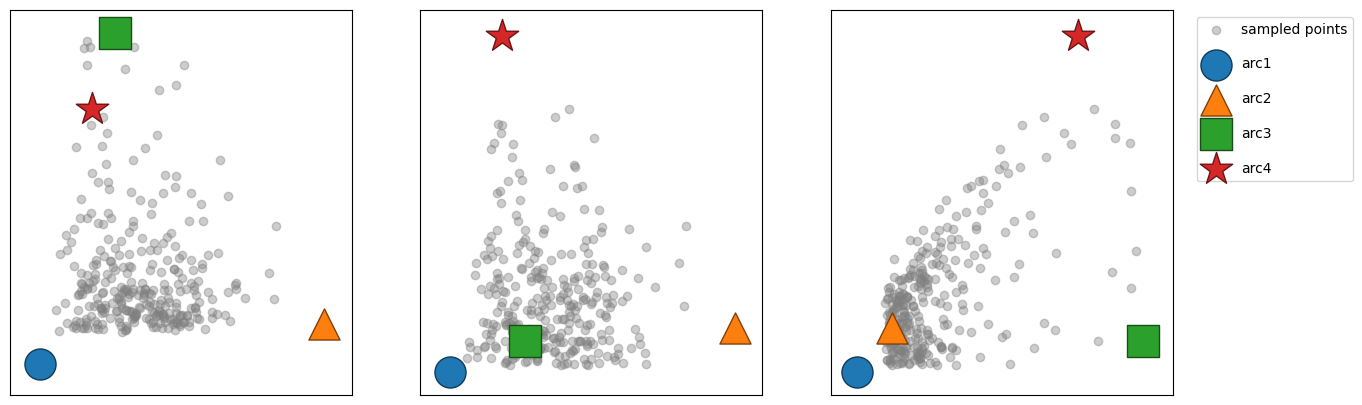

In [5]:
fig_m,axs_m = plt.subplots(ncols = 3,figsize = (15,5))
#axs_m[0].set_xlabel('Immune Response')
#axs_m[0].set_ylabel('Parasites')
axs_m[0].scatter(df_microbial['I.zscore'], df_microbial['M.zscore'],c='grey',alpha = 0.4,zorder = -1)
plot_archetypes_2d(arcs_m,axs_m[0],2,0)
axs_m[0].set_xlim(arcs_m[:,2].min()*1.3,arcs_m[:,2].max()*1.15)
axs_m[0].set_ylim(arcs_m[:,0].min()*1.3,arcs_m[:,0].max()*1.1)

print(arcs_m)
#axs_m[1].set_xlabel('Immune Response')
#axs_m[1].set_ylabel('Damage')
axs_m[1].scatter(df_microbial[f'I.zscore'], df_microbial[f'D.zscore'],c='grey',alpha = 0.4,zorder = -1)
plot_archetypes_2d(arcs_m,axs_m[1],2,1)
axs_m[1].set_xlim(min(arcs_m[:,2].min(),df_microbial[f'I.zscore'].min())*1.3,arcs_m[:,2].max()*1.15)
axs_m[1].set_ylim(min(arcs_m[:,1].min(),df_microbial[f'D.zscore'].min())*1.3,arcs_m[:,1].max()*1.1)

#axs_m[2].set_xlabel('Parasites')
#axs_m[2].set_ylabel('Damage')
axs_m[2].scatter(df_microbial['M.zscore'], df_microbial['D.zscore'],c='grey',alpha = 0.4,zorder = -1,label = 'sampled points',)
plot_archetypes_2d(arcs_m,axs_m[2],0,1,['arc1','arc2','arc3','arc4'])
axs_m[2].set_xlim(min(arcs_m[:,0].min(),df_microbial[f'M.zscore'].min())*1.3,arcs_m[:,0].max()*1.15)
axs_m[2].set_ylim(min(arcs_m[:,1].min(),df_microbial[f'D.zscore'].min())*1.3,arcs_m[:,1].max()*1.1)

axs_m[2].legend(bbox_to_anchor=(1.05, 1),loc = 'upper left',labelspacing = 1.5)

for ax in axs_m:
    ax.tick_params(left = False,bottom=False, labelbottom = False, labelleft =False) 
fig_m.savefig('2C.png',dpi=600,bbox_inches = 'tight')
fig_m.savefig('2C.pdf',dpi=600,bbox_inches = 'tight')

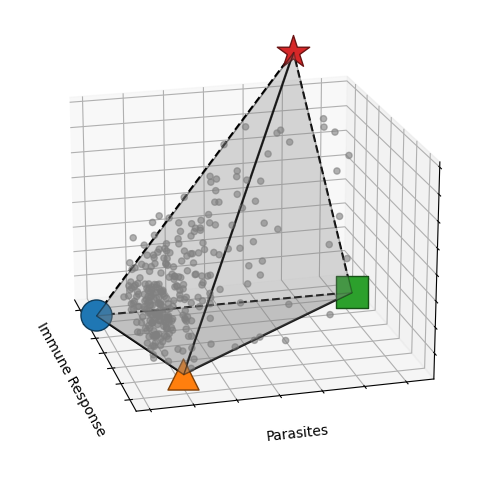

In [6]:
fig_3d_m = plt.figure(figsize=(8, 6))
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

ax_3d_m = fig_3d_m.add_subplot(111, projection='3d')
ax_3d_m.scatter(df_microbial['I.zscore'], df_microbial['M.zscore'], df_microbial['D.zscore'],alpha = 0.6,c = 'grey',zorder = -1)
for arc,c,m,s in zip([arc1_m,arc2_m,arc3_m,arc4_m],colors_m,markers,sizes):
    ax_3d_m.scatter(arc[2], arc[0], arc[1],s = s,marker = m, color = c,edgecolors = edgecolors[c])
ax_3d_m.xaxis.labelpad = -1
ax_3d_m.yaxis.labelpad = -1
ax_3d_m.zaxis.labelpad = -1
z_values = np.concatenate([df_microbial['D.zscore'],np.array([arc1_m[1],arc2_m[1],arc3_m[1],arc4_m[1]])])

vertices_tr1 = [[arc1_m[2],arc1_m[0],arc1_m[1]],[arc2_m[2],arc2_m[0],arc2_m[1]],[arc3_m[2],arc3_m[0],arc3_m[1]]]
vertices_tr2 = [[arc1_m[2],arc1_m[0],arc1_m[1]],[arc2_m[2],arc2_m[0],arc2_m[1]],[arc4_m[2],arc4_m[0],arc4_m[1]]]
vertices_tr3 = [[arc3_m[2],arc3_m[0],arc3_m[1]],[arc2_m[2],arc2_m[0],arc2_m[1]],[arc4_m[2],arc4_m[0],arc4_m[1]]]
vertices_tr4 = [[arc1_m[2],arc1_m[0],arc1_m[1]],[arc1_m[2],arc1_m[0],arc1_m[1]],[arc4_m[2],arc4_m[0],arc4_m[1]]]

triangle = Poly3DCollection([vertices_tr1], color='grey', alpha=0.2,zorder = 0)
ax_3d_m.add_collection3d(Poly3DCollection([vertices_tr1], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
ax_3d_m.add_collection3d(Poly3DCollection([vertices_tr2], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
ax_3d_m.add_collection3d(Poly3DCollection([vertices_tr3], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
ax_3d_m.add_collection3d(Poly3DCollection([vertices_tr4], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
ax_3d_m.plot([arc1_m[2],arc2_m[2]],[arc1_m[0],arc2_m[0]],[arc1_m[1],arc2_m[1]],color = 'black',zorder = 1)
ax_3d_m.plot([arc2_m[2],arc3_m[2]],[arc2_m[0],arc3_m[0]],[arc2_m[1],arc3_m[1]],color = 'black',zorder = 1)
ax_3d_m.plot([arc1_m[2],arc3_m[2]],[arc1_m[0],arc3_m[0]],[arc1_m[1],arc3_m[1]],'--',color = 'black',zorder = 1)
ax_3d_m.plot([arc1_m[2],arc4_m[2]],[arc1_m[0],arc4_m[0]],[arc1_m[1],arc4_m[1]],'--',color = 'black',zorder = 1)
ax_3d_m.plot([arc3_m[2],arc4_m[2]],[arc3_m[0],arc4_m[0]],[arc3_m[1],arc4_m[1]],'--',color = 'black',zorder = 1)
ax_3d_m.plot([arc2_m[2],arc4_m[2]],[arc2_m[0],arc4_m[0]],[arc2_m[1],arc4_m[1]],color = 'black',zorder = 1)

ax_3d_m.set_zlim(min(z_values)*0.75,max(z_values)*0.75)
ax_3d_m.set_ylabel('Parasites')
#ax_3d_m.set_zlabel('Damage')
ax_3d_m.set_xlabel('Immune Response')
ax_3d_m.tick_params(axis = 'both',bottom = False, right =False, labelleft = False, labelbottom = False)
ax_3d_m.view_init(elev=20., azim=-15, roll=0)

fig_3d_m.savefig('2B.png',dpi = 600)
fig_3d_m.savefig('2B.pdf',dpi = 600)

In [24]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
colors_hex_m = ['#1e76b3','#ff7e0d','#2c9f2c','#d52627']
markers_plotly = ['circle','diamond','square','x']
fig.add_trace(go.Scatter3d(
    x=df_microbial['I.zscore'],
    y=df_microbial['M.zscore'],
    z=df_microbial['D.zscore'],
    mode='markers',
    marker=dict(size=3, color='grey', opacity=0.6),
    name='Simulations Summary'
))
names = ['Anansi','Paladin','Honey Badger','Ate']
# Add archetype points
for arc, c, m, s,n in zip([arc1_m, arc2_m, arc3_m, arc4_m], colors_hex_m, markers_plotly, sizes,names):
    fig.add_trace(go.Scatter3d(
        x=[arc[2]],
        y=[arc[0]],
        z=[arc[1]],
        mode='markers',
        marker=dict( color=c, symbol=m),
        name=f"{n}"
    ))

# Create mesh triangles (Plotly uses i, j, k for triangle faces)
vertices = np.array([
    [arc1_m[2], arc1_m[0], arc1_m[1]],
    [arc2_m[2], arc2_m[0], arc2_m[1]],
    [arc3_m[2], arc3_m[0], arc3_m[1]],
    [arc4_m[2], arc4_m[0], arc4_m[1]]
])
x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]

# Indices for triangle faces
faces = [
    [0, 1, 2],
    [0, 1, 3],
    [1, 2, 3],
    [0, 0, 3]
]

i, j, k = zip(*faces)

fig.add_trace(go.Mesh3d(
    x=x, y=y, z=z,
    i=i, j=j, k=k,
    color='lightgrey',
    opacity=0.3,
    name='Archetype Volume',
    flatshading=True,
    showscale=False
))

# Add connecting lines (manually, as in matplotlib `plot`)
def add_line(p1, p2, dashed=False):
    fig.add_trace(go.Scatter3d(
        x=[p1[2], p2[2]],
        y=[p1[0], p2[0]],
        z=[p1[1], p2[1]],
        mode='lines',
        line=dict(color='black', width=2, dash='dash' if dashed else 'solid'),
        showlegend=False
    ))

add_line(arc1_m, arc2_m)
add_line(arc2_m, arc3_m)
add_line(arc1_m, arc3_m, dashed=True)
add_line(arc1_m, arc4_m, dashed=True)
add_line(arc3_m, arc4_m, dashed=True)
add_line(arc2_m, arc4_m)

# Set axis limits
z_values = np.concatenate([df_microbial['D.zscore'], [arc[1] for arc in [arc1_m, arc2_m, arc3_m, arc4_m]]])
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Immune Response', showticklabels=False, showbackground=True),
        yaxis=dict(title='Parasites', showticklabels=False, showbackground=True),
        zaxis=dict(title='Damage', showticklabels=False, showbackground=True),
        camera=dict(eye=dict(x=1.5, y=-1.5, z=1), up=dict(x=0, y=0, z=1))
    ),
    #margin=dict(l=0, r=0, b=0, t=30),
    title='3D Mostly Microbe Damage Plot with Archetypes'
)

fig.write_html('microbial_3D_plot.html')
fig.show()


[[-0.86702615 -1.23964146 -2.71201516]
 [-0.36444265 -2.0182357   3.29067686]
 [ 3.52771727 -0.13068817 -0.98310404]
 [-0.23162722  4.38973008  2.73030815]]


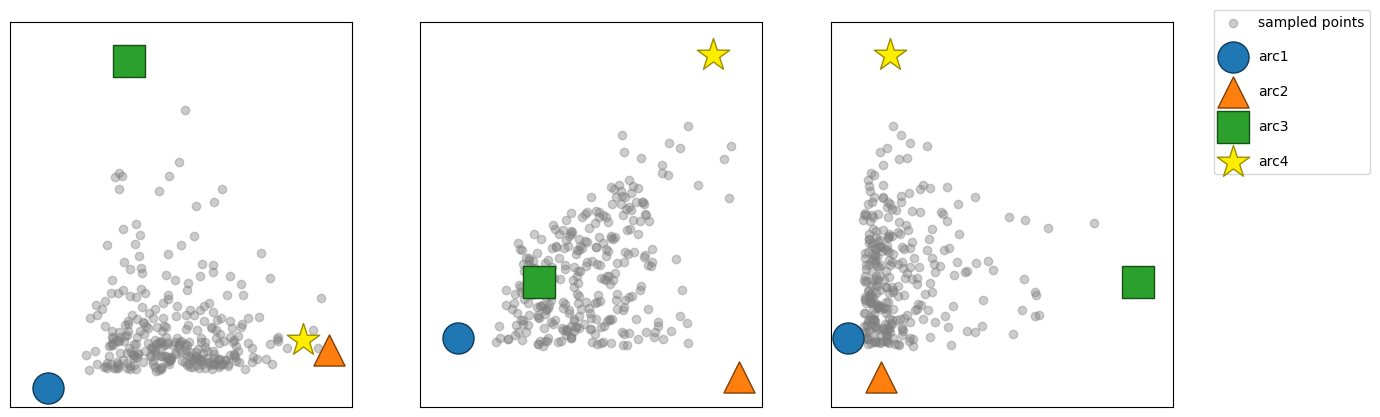

In [7]:
fig_i,axs_i = plt.subplots(ncols = 3,figsize = (15,5))
print(arcs_i)
#axs_i[0].set_xlabel('Immune Response')
#axs_i[0].set_ylabel('Parasites')
axs_i[0].scatter(df_immune['I.zscore'], df_immune['M.zscore'],c='grey',alpha = 0.4)
plot_archetypes_2d(arcs_i,axs_i[0],2,0,colors = colors_i)
axs_i[0].set_xlim(min(arcs_i[:,2].min(),df_immune[f'I.zscore'].min())*1.3,arcs_i[:,2].max()*1.15)
axs_i[0].set_ylim(min(arcs_i[:,0].min(),df_immune[f'M.zscore'].min())*1.3,arcs_i[:,0].max()*1.15)

#axs_i[1].set_xlabel('Immune Response')
#axs_i[1].set_ylabel('Damage')
axs_i[1].scatter(df_immune[f'I.zscore'], df_immune[f'D.zscore'],c='grey',alpha = 0.4)
plot_archetypes_2d(arcs_i,axs_i[1],2,1,colors = colors_i)
axs_i[1].set_xlim(min(arcs_i[:,2].min(),df_immune[f'I.zscore'].min())*1.3,arcs_i[:,2].max()*1.15)
axs_i[1].set_ylim(min(arcs_i[:,1].min(),df_immune[f'D.zscore'].min())*1.3,arcs_i[:,1].max()*1.15)

#axs_i[2].set_xlabel('Parasites')
#axs_i[2].set_ylabel('Damage')
axs_i[2].scatter(df_immune['M.zscore'], df_immune['D.zscore'],c='grey',alpha = 0.4,label = 'sampled points')
plot_archetypes_2d(arcs_i,axs_i[2],0,1,['arc1','arc2','arc3','arc4'],colors = colors_i)
axs_i[2].set_xlim(min(arcs_i[:,0].min(),df_immune[f'M.zscore'].min())*1.3,arcs_i[:,0].max()*1.15)
axs_i[2].set_ylim(min(arcs_i[:,1].min(),df_immune[f'D.zscore'].min())*1.3,arcs_i[:,1].max()*1.15)

axs_i[2].legend(bbox_to_anchor=(1.1, 1.05),loc = 'upper left',labelspacing = 1.5)
for ax in axs_i:
    ax.tick_params(left = False,bottom=False, labelbottom = False, labelleft =False) 
    pass
fig_i.savefig('2F.png',dpi=600,bbox_inches = 'tight')
fig_i.savefig('2F.pdf',dpi=600,bbox_inches = 'tight')

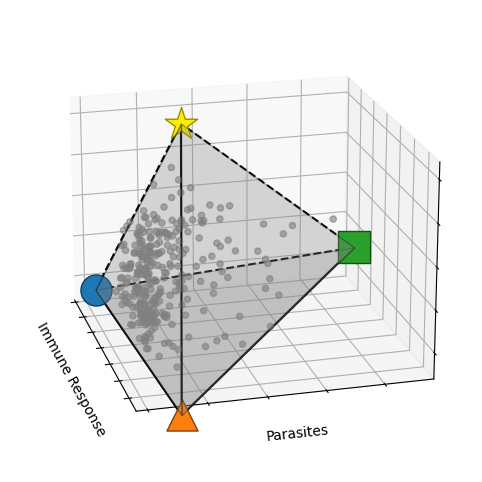

In [8]:
fig_3d_i = plt.figure(figsize=(8, 6))
ax_3d_i = fig_3d_i.add_subplot(111, projection='3d')
ax_3d_i.scatter(df_immune['I.zscore'], df_immune['M.zscore'], df_immune['D.zscore'],alpha = 0.6,c = 'grey',zorder = -1)
colors = ['tab:blue','tab:orange','tab:green','tab:red']
markers = ['o','^','s','*']
for arc,c,m,s in zip([arc1_i,arc2_i,arc3_i,arc4_i],colors_i,markers,sizes):
    ax_3d_i.scatter(arc[2], arc[0], arc[1],s = s,marker = m, color = c,edgecolors = edgecolors[c])
ax_3d_i.xaxis.labelpad = -1
ax_3d_i.yaxis.labelpad = -1
ax_3d_i.zaxis.labelpad = -1
x_values = np.concatenate([df_immune['I.zscore'],np.array([arc1_i[2],arc2_i[2],arc3_i[2],arc4_i[2]])])
y_values = np.concatenate([df_immune['M.zscore'],np.array([arc1_i[0],arc2_i[0],arc3_i[0],arc4_i[0]])])
z_values = np.concatenate([df_immune['D.zscore'],np.array([arc1_i[1],arc2_i[1],arc3_i[1],arc4_i[1]])])

vertices_tr1 = [[arc1_i[2],arc1_i[0],arc1_i[1]],[arc2_i[2],arc2_i[0],arc2_i[1]],[arc3_i[2],arc3_i[0],arc3_i[1]]]
vertices_tr2 = [[arc1_i[2],arc1_i[0],arc1_i[1]],[arc2_i[2],arc2_i[0],arc2_i[1]],[arc4_i[2],arc4_i[0],arc4_i[1]]]
vertices_tr3 = [[arc3_i[2],arc3_i[0],arc3_i[1]],[arc2_i[2],arc2_i[0],arc2_i[1]],[arc4_i[2],arc4_i[0],arc4_i[1]]]
vertices_tr4 = [[arc1_i[2],arc1_i[0],arc1_i[1]],[arc1_i[2],arc1_i[0],arc1_i[1]],[arc4_i[2],arc4_i[0],arc4_i[1]]]

triangle = Poly3DCollection([vertices_tr1], color='grey', alpha=0.2,zorder = 0)
ax_3d_i.add_collection3d(Poly3DCollection([vertices_tr1], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
ax_3d_i.add_collection3d(Poly3DCollection([vertices_tr2], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
ax_3d_i.add_collection3d(Poly3DCollection([vertices_tr3], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
ax_3d_i.add_collection3d(Poly3DCollection([vertices_tr4], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
ax_3d_i.plot([arc1_i[2],arc2_i[2]],[arc1_i[0],arc2_i[0]],[arc1_i[1],arc2_i[1]],color = 'black',zorder = 1)
ax_3d_i.plot([arc2_i[2],arc3_i[2]],[arc2_i[0],arc3_i[0]],[arc2_i[1],arc3_i[1]],color = 'black',zorder = 1)
ax_3d_i.plot([arc1_i[2],arc3_i[2]],[arc1_i[0],arc3_i[0]],[arc1_i[1],arc3_i[1]],'--',color = 'black',zorder = 1)
ax_3d_i.plot([arc1_i[2],arc4_i[2]],[arc1_i[0],arc4_i[0]],[arc1_i[1],arc4_i[1]],'--',color = 'black',zorder = 1)
ax_3d_i.plot([arc3_i[2],arc4_i[2]],[arc3_i[0],arc4_i[0]],[arc3_i[1],arc4_i[1]],'--',color = 'black',zorder = 1)
ax_3d_i.plot([arc2_i[2],arc4_i[2]],[arc2_i[0],arc4_i[0]],[arc2_i[1],arc4_i[1]],color = 'black',zorder = 1)
#ax_3d_i.set_xlim(min(x_values)*1.1,max(x_values)*1.2)
#ax_3d_i.set_ylim(min(y_values)*1.1,max(y_values)*1.2)
ax_3d_i.set_zlim(min(z_values)*0.75,max(z_values)*0.75)
ax_3d_i.set_xlabel('Immune Response')
ax_3d_i.set_ylabel('Parasites')
#ax_3d_i.set_zlabel('Damage')
ax_3d_i.tick_params(axis = 'both',bottom = False, right =False, labelleft = False, labelbottom = False)
ax_3d_i.view_init(elev=20., azim=-15, roll=0)

fig_3d_i.savefig('2E.png',dpi = 600)
fig_3d_i.savefig('2E.pdf',dpi = 600)

In [23]:
import plotly.graph_objects as go
import numpy as np

# Base scatter of all immune data
fig = go.Figure()
colors_hex_i = ['#1e76b3','#ff7e0d','#2c9f2c','#ffed00']
markers_plotly = ['circle','diamond','square','x']
fig.add_trace(go.Scatter3d(
    x=df_immune['I.zscore'],
    y=df_immune['M.zscore'],
    z=df_immune['D.zscore'],
    mode='markers',
    marker=dict(size=3, color='grey', opacity=0.6),
    name='Simulations Summary'
))
names = ['Anansi','Paladin','Honey Badger','Wolverine']
# Add archetype points
for arc, c, m, s,n in zip([arc1_i, arc2_i, arc3_i, arc4_i], colors_hex_i, markers_plotly, sizes,names):
    fig.add_trace(go.Scatter3d(
        x=[arc[2]],
        y=[arc[0]],
        z=[arc[1]],
        mode='markers',
        marker=dict( color=c, symbol=m),
        name=f"{n}"
    ))

# Create mesh triangles (Plotly uses i, j, k for triangle faces)
vertices = np.array([
    [arc1_i[2], arc1_i[0], arc1_i[1]],
    [arc2_i[2], arc2_i[0], arc2_i[1]],
    [arc3_i[2], arc3_i[0], arc3_i[1]],
    [arc4_i[2], arc4_i[0], arc4_i[1]]
])
x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]

# Indices for triangle faces
faces = [
    [0, 1, 2],
    [0, 1, 3],
    [1, 2, 3],
    [0, 0, 3]
]

i, j, k = zip(*faces)

fig.add_trace(go.Mesh3d(
    x=x, y=y, z=z,
    i=i, j=j, k=k,
    color='lightgrey',
    opacity=0.3,
    name='Archetype Volume',
    flatshading=True,
    showscale=False
))

# Add connecting lines (manually, as in matplotlib `plot`)
def add_line(p1, p2, dashed=False):
    fig.add_trace(go.Scatter3d(
        x=[p1[2], p2[2]],
        y=[p1[0], p2[0]],
        z=[p1[1], p2[1]],
        mode='lines',
        line=dict(color='black', width=2, dash='dash' if dashed else 'solid'),
        showlegend=False
    ))

add_line(arc1_i, arc2_i)
add_line(arc2_i, arc3_i)
add_line(arc1_i, arc3_i, dashed=True)
add_line(arc1_i, arc4_i, dashed=True)
add_line(arc3_i, arc4_i, dashed=True)
add_line(arc2_i, arc4_i)

# Set axis limits
z_values = np.concatenate([df_immune['D.zscore'], [arc[1] for arc in [arc1_i, arc2_i, arc3_i, arc4_i]]])
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Immune Response', showticklabels=False, showbackground=True),
        yaxis=dict(title='Parasites', showticklabels=False, showbackground=True),
        zaxis=dict(title='Damage', showticklabels=False, showbackground=True),
        camera=dict(eye=dict(x=1.5, y=-1.5, z=1), up=dict(x=0, y=0, z=1))
    ),
    #margin=dict(l=0, r=0, b=0, t=30),
    title='3D Mostly Immune Damage Plot with Archetypes'
)

fig.write_html('immune_3D_plot.html')
fig.show()


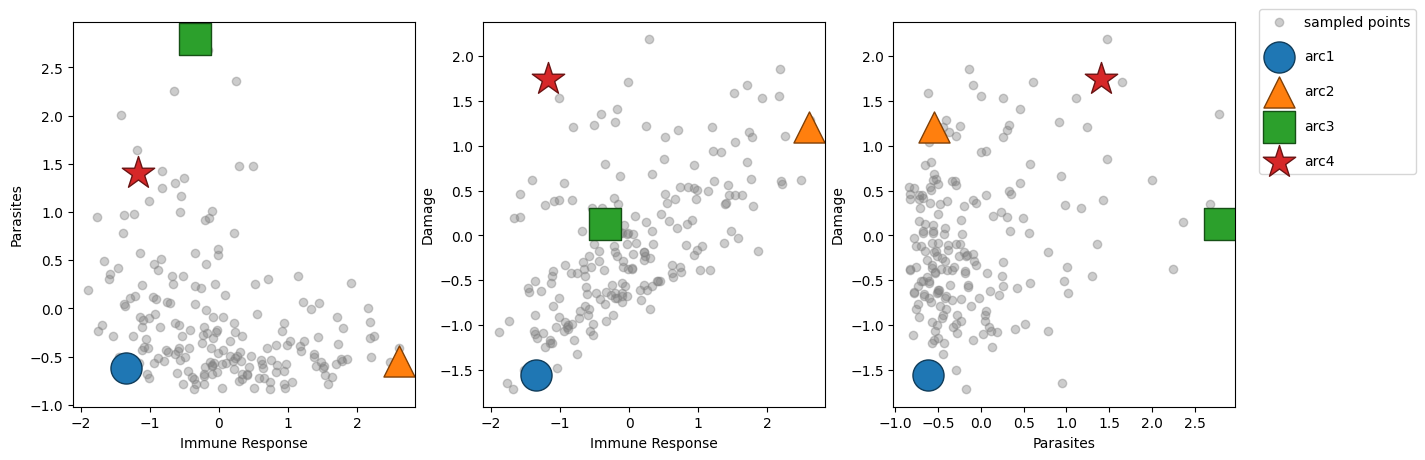

In [ ]:
fig_r,axs_r = plt.subplots(ncols = 3,figsize = (15,5))
    
axs_r[0].set_xlabel('Immune Response')
axs_r[0].set_ylabel('Parasites')
axs_r[0].scatter(df_rbc['I.zscore'], df_rbc['M.zscore'],c='grey',alpha = 0.4)
plot_archetypes_2d(arcs_r,axs_r[0],2,0)

axs_r[1].set_xlabel('Immune Response')
axs_r[1].set_ylabel('Damage')
axs_r[1].scatter(df_rbc[f'I.zscore'], df_rbc[f'D.zscore'],c='grey',alpha = 0.4)
plot_archetypes_2d(arcs_r,axs_r[1],2,1)

axs_r[2].set_xlabel('Parasites')
axs_r[2].set_ylabel('Damage')
axs_r[2].scatter(df_rbc['M.zscore'], df_rbc['D.zscore'],c='grey',alpha = 0.4,label = 'sampled points')
plot_archetypes_2d(arcs_r,axs_r[2],0,1,['arc1','arc2','arc3','arc4'])


axs_r[2].legend(bbox_to_anchor=(1.05, 1.05),loc = 'upper left',labelspacing = 1.5)
"""for i,ax in enumerate(axs_r):
    if i==0:
        ax.set_ylim(top = 6)
    else:
        ax.set_ylim(top = 4)
        if i==2:
            ax.set_xlim(right = 6)
    #ax.tick_params(left = False,bottom=False, labelbottom = False, labelleft =False) """
fig_r.savefig('2F_rbc.png',dpi=600,bbox_inches = 'tight')
fig_r.savefig('2F_rbc.pdf',dpi=600,bbox_inches = 'tight')

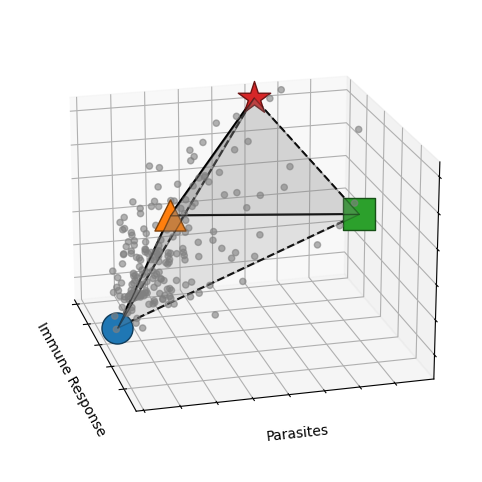

In [ ]:
fig_3d_r = plt.figure(figsize=(8, 6))
ax_3d_r = fig_3d_r.add_subplot(111, projection='3d')
ax_3d_r.scatter(df_rbc['I.zscore'], df_rbc['M.zscore'], df_rbc['D.zscore'],alpha = 0.6,c = 'grey',zorder = -1)
colors = ['tab:blue','tab:orange','tab:green','tab:red']
markers = ['o','^','s','*']
for arc,c,m,s in zip([arc1_r,arc2_r,arc3_r,arc4_r],colors,markers,sizes):
    ax_3d_r.scatter(arc[2], arc[0], arc[1],s = s,marker = m, color = c,edgecolor = edgecolors[c],zorder = 1)
ax_3d_r.xaxis.labelpad = -1
ax_3d_r.yaxis.labelpad = -1
ax_3d_r.zaxis.labelpad = -1

vertices_tr1 = [[arc1_r[2],arc1_r[0],arc1_r[1]],[arc2_r[2],arc2_r[0],arc2_r[1]],[arc3_r[2],arc3_r[0],arc3_r[1]]]
vertices_tr2 = [[arc1_r[2],arc1_r[0],arc1_r[1]],[arc2_r[2],arc2_r[0],arc2_r[1]],[arc4_r[2],arc4_r[0],arc4_r[1]]]
vertices_tr3 = [[arc3_r[2],arc3_r[0],arc3_r[1]],[arc2_r[2],arc2_r[0],arc2_r[1]],[arc4_r[2],arc4_r[0],arc4_r[1]]]
vertices_tr4 = [[arc1_r[2],arc1_r[0],arc1_r[1]],[arc1_r[2],arc1_r[0],arc1_r[1]],[arc4_r[2],arc4_r[0],arc4_r[1]]]

triangle = Poly3DCollection([vertices_tr1], color='grey', alpha=0.2,zorder = 0)
ax_3d_r.add_collection3d(Poly3DCollection([vertices_tr1], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
ax_3d_r.add_collection3d(Poly3DCollection([vertices_tr2], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
ax_3d_r.add_collection3d(Poly3DCollection([vertices_tr3], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
ax_3d_r.add_collection3d(Poly3DCollection([vertices_tr4], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
ax_3d_r.plot([arc1_r[2],arc2_r[2]],[arc1_r[0],arc2_r[0]],[arc1_r[1],arc2_r[1]],color = 'black',zorder = 1)
ax_3d_r.plot([arc2_r[2],arc3_r[2]],[arc2_r[0],arc3_r[0]],[arc2_r[1],arc3_r[1]],color = 'black',zorder = 1)
ax_3d_r.plot([arc1_r[2],arc3_r[2]],[arc1_r[0],arc3_r[0]],[arc1_r[1],arc3_r[1]],'--',color = 'black',zorder = 1)
ax_3d_r.plot([arc1_r[2],arc4_r[2]],[arc1_r[0],arc4_r[0]],[arc1_r[1],arc4_r[1]],'--',color = 'black',zorder = 1)
ax_3d_r.plot([arc3_r[2],arc4_r[2]],[arc3_r[0],arc4_r[0]],[arc3_r[1],arc4_r[1]],'--',color = 'black',zorder = 1)
ax_3d_r.plot([arc2_r[2],arc4_r[2]],[arc2_r[0],arc4_r[0]],[arc2_r[1],arc4_r[1]],color = 'black',zorder = 1)
x_values = np.concatenate([df_rbc['I.zscore'],np.array([arc1_r[2],arc2_r[2],arc3_r[2],arc4_r[2]])])
y_values = np.concatenate([df_rbc['M.zscore'],np.array([arc1_r[0],arc2_r[0],arc3_r[0],arc4_r[0]])])
z_values = np.concatenate([df_rbc['D.zscore'],np.array([arc1_r[1],arc2_r[1],arc3_r[1],arc4_r[1]])])
ax_3d_r.set_zlim(min(z_values)*0.75,max(z_values)*0.75)
ax_3d_r.set_xlabel('Immune Response')
ax_3d_r.set_ylabel('Parasites')

ax_3d_r.tick_params(axis = 'both',bottom = False, right =False, labelleft = False, labelbottom = False)
ax_3d_r.view_init(elev=20., azim=-15, roll=0)

fig_3d_r.savefig('2E_rbc.png',dpi = 600)
fig_3d_r.savefig('2E_rbc.pdf',dpi = 600)

In [22]:

# Base scatter of all immune data
fig = go.Figure()
markers_plotly = ['circle','diamond','square','x']
fig.add_trace(go.Scatter3d(
    x=df_rbc['I.zscore'],
    y=df_rbc['M.zscore'],
    z=df_rbc['D.zscore'],
    mode='markers',
    marker=dict(size=3, color='grey', opacity=0.6),
    name='Simulations Summary'
))
names = ['Anansi','Paladin','Honey Badger','Ate']
# Add archetype points
for arc, c, m, s,n in zip([arc1_r, arc2_r, arc3_r, arc4_r], colors_hex_m, markers_plotly, sizes,names):
    fig.add_trace(go.Scatter3d(
        x=[arc[2]],
        y=[arc[0]],
        z=[arc[1]],
        mode='markers',
        marker=dict( color=c, symbol=m),
        name=f"{n}"
    ))

# Create mesh triangles (Plotly uses i, j, k for triangle faces)
vertices = np.array([
    [arc1_r[2], arc1_r[0], arc1_r[1]],
    [arc2_r[2], arc2_r[0], arc2_r[1]],
    [arc3_r[2], arc3_r[0], arc3_r[1]],
    [arc4_r[2], arc4_r[0], arc4_r[1]]
])
x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]

# Indices for triangle faces
faces = [
    [0, 1, 2],
    [0, 1, 3],
    [1, 2, 3],
    [0, 0, 3]
]

i, j, k = zip(*faces)

fig.add_trace(go.Mesh3d(
    x=x, y=y, z=z,
    i=i, j=j, k=k,
    color='lightgrey',
    opacity=0.3,
    name='Archetype Volume',
    flatshading=True,
    showscale=False
))

# Add connecting lines (manually, as in matplotlib `plot`)
def add_line(p1, p2, dashed=False):
    fig.add_trace(go.Scatter3d(
        x=[p1[2], p2[2]],
        y=[p1[0], p2[0]],
        z=[p1[1], p2[1]],
        mode='lines',
        line=dict(color='black', width=2, dash='dash' if dashed else 'solid'),
        showlegend=False
    ))

add_line(arc1_r, arc2_r)
add_line(arc2_r, arc3_r)
add_line(arc1_r, arc3_r, dashed=True)
add_line(arc1_r, arc4_r, dashed=True)
add_line(arc3_r, arc4_r, dashed=True)
add_line(arc2_r, arc4_r)

# Set axis limits
z_values = np.concatenate([df_rbc['D.zscore'], [arc[1] for arc in [arc1_r, arc2_r, arc3_r, arc4_r]]])
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Immune Response', showticklabels=False, showbackground=True),
        yaxis=dict(title='Parasites', showticklabels=False, showbackground=True),
        zaxis=dict(title='Damage', showticklabels=False, showbackground=True),
        camera=dict(eye=dict(x=1.5, y=-1.5, z=1), up=dict(x=0, y=0, z=1))
    ),
    #margin=dict(l=0, r=0, b=0, t=30),
    title='3D RBC Variation Plot with Archetypes'
)

fig.write_html('rbc_3D_plot.html')
fig.show()
